## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [2]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# Carregar a base de dados
df = pd.read_csv("housing.csv")

# Dropando valores ausentes
df = df.dropna()

# Convertendo 'ocean_proximity' para variável numérica
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Separando os dados
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando uma árvore de regressão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [4]:
# Obtendo o caminho de poda (CCP-alpha)
path = tree_model.cost_complexity_pruning_path(X_train, y_train)

# Mostrando o caminho (valores de alpha)
ccp_alphas = path.ccp_alphas
print("Valores de CCP-alpha:", ccp_alphas)


Valores de CCP-alpha: [0.00000000e+00 3.05885232e-05 3.05885232e-05 ... 7.97000620e+08
 1.65869170e+09 4.09235809e+09]


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [5]:
# Garantindo que você tenha os alphas calculados antes
# ccp_alphas já deve ter sido extraído da árvore original:
# path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas = path.ccp_alphas

# 1. Criar uma amostra de 20% da base de treino pra evitar travamento
X_sample = X_train.sample(frac=0.2, random_state=42)
y_sample = y_train.loc[X_sample.index]

# 2. Lista para armazenar as árvores treinadas
trees = []

# 3. Treinar uma árvore para cada alpha (limitado aos primeiros 30 alphas)
for i, alpha in enumerate(ccp_alphas[:30]):
    print(f"Treinando {i+1}/30 com alpha = {alpha:.5f}")
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    model.fit(X_sample, y_sample)
    trees.append(model)


Treinando 1/30 com alpha = 0.00000
Treinando 2/30 com alpha = 0.00003
Treinando 3/30 com alpha = 0.00003
Treinando 4/30 com alpha = 0.00003
Treinando 5/30 com alpha = 0.00003
Treinando 6/30 com alpha = 0.00004
Treinando 7/30 com alpha = 0.00004
Treinando 8/30 com alpha = 0.00005
Treinando 9/30 com alpha = 0.00005
Treinando 10/30 com alpha = 0.00005
Treinando 11/30 com alpha = 0.00005
Treinando 12/30 com alpha = 0.00005
Treinando 13/30 com alpha = 0.00005
Treinando 14/30 com alpha = 0.30589
Treinando 15/30 com alpha = 0.30589
Treinando 16/30 com alpha = 0.30589
Treinando 17/30 com alpha = 0.30589
Treinando 18/30 com alpha = 0.30589
Treinando 19/30 com alpha = 0.30589
Treinando 20/30 com alpha = 0.30589
Treinando 21/30 com alpha = 0.30589
Treinando 22/30 com alpha = 0.30589
Treinando 23/30 com alpha = 0.30589
Treinando 24/30 com alpha = 0.30589
Treinando 25/30 com alpha = 0.30589
Treinando 26/30 com alpha = 0.30589
Treinando 27/30 com alpha = 0.30589
Treinando 28/30 com alpha = 0.30589
T

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [6]:
# Calculando o MSE para cada árvore
mse_train = []
mse_test = []

for tree in trees:
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Exibindo os MSEs
print("MSE no treino:", mse_train)
print("MSE no teste:", mse_test)


MSE no treino: [4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703816.750276, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708, 4567703939.218708]
MSE no teste: [5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222012.962809, 5561222034.258129, 5561222034.258129, 5561222034.258129, 5561222034.258129, 5561222034.258129, 5561222034.258129, 5561222034.258129, 5561222034.258129, 

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

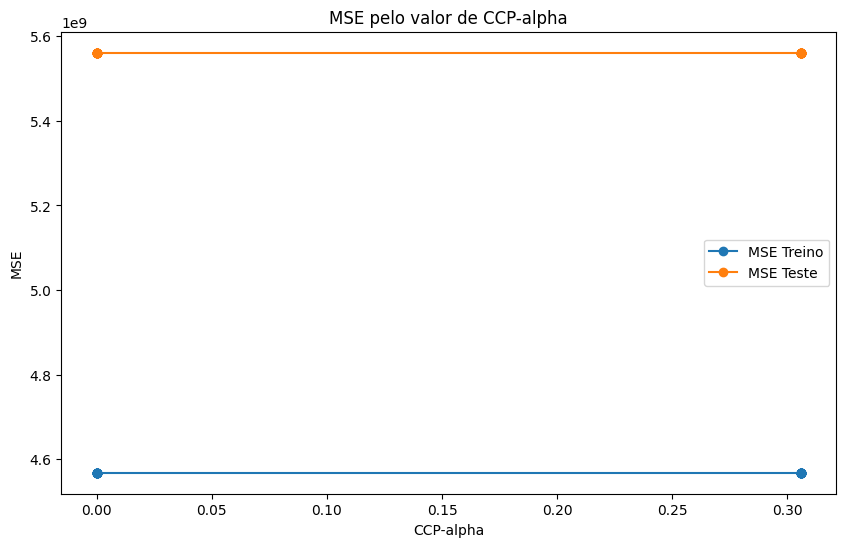

In [7]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:30], mse_train, label="MSE Treino", marker='o')
plt.plot(ccp_alphas[:30], mse_test, label="MSE Teste", marker='o')
plt.xlabel("CCP-alpha")
plt.ylabel("MSE")
plt.title("MSE pelo valor de CCP-alpha")
plt.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [8]:
# Escolhendo o melhor alpha (o que minimiza o MSE de teste)
best_alpha_idx = mse_test.index(min(mse_test))
best_tree = trees[best_alpha_idx]

# Calculando o R-quadrado para a árvore
r_squared = best_tree.score(X_test, y_test)
print(f"R-quadrado da árvore com alpha = {ccp_alphas[best_alpha_idx]}: {r_squared}")


R-quadrado da árvore com alpha = 0.0: 0.5933346622637471


### 7. Visualize esta árvore.

## **Este aqui rodou porem demorou 1 min e pouco quase 2min entt eu fiz um alternativo abaixo**

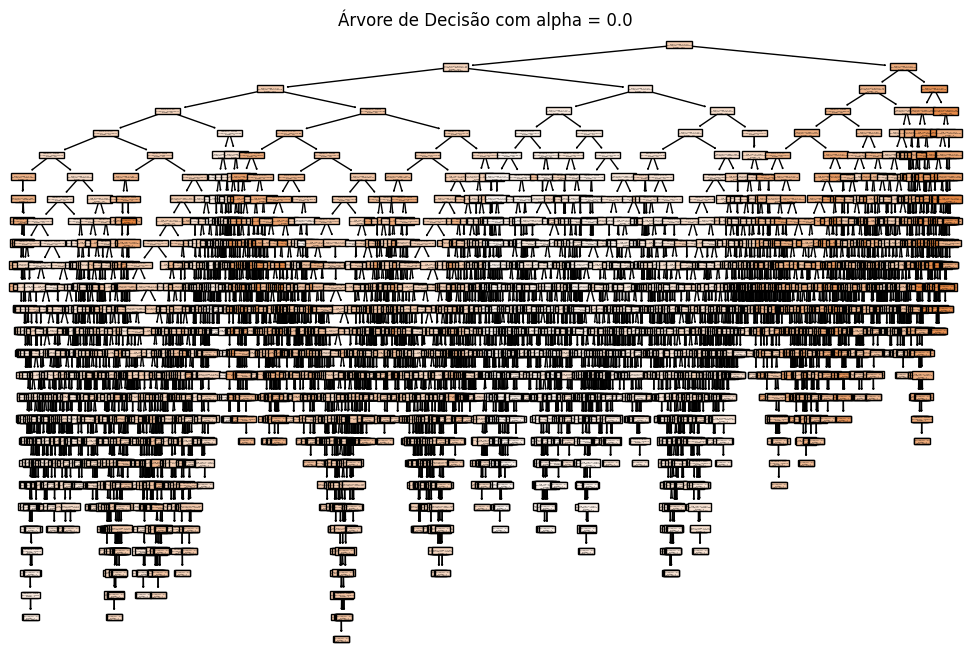

In [10]:
#plt.figure(figsize=(12, 8))
#plot_tree(best_tree, filled=True, feature_names=X.columns)
#plt.title(f"Árvore de Decisão com alpha = {ccp_alphas[best_alpha_idx]}")
#plt.show()


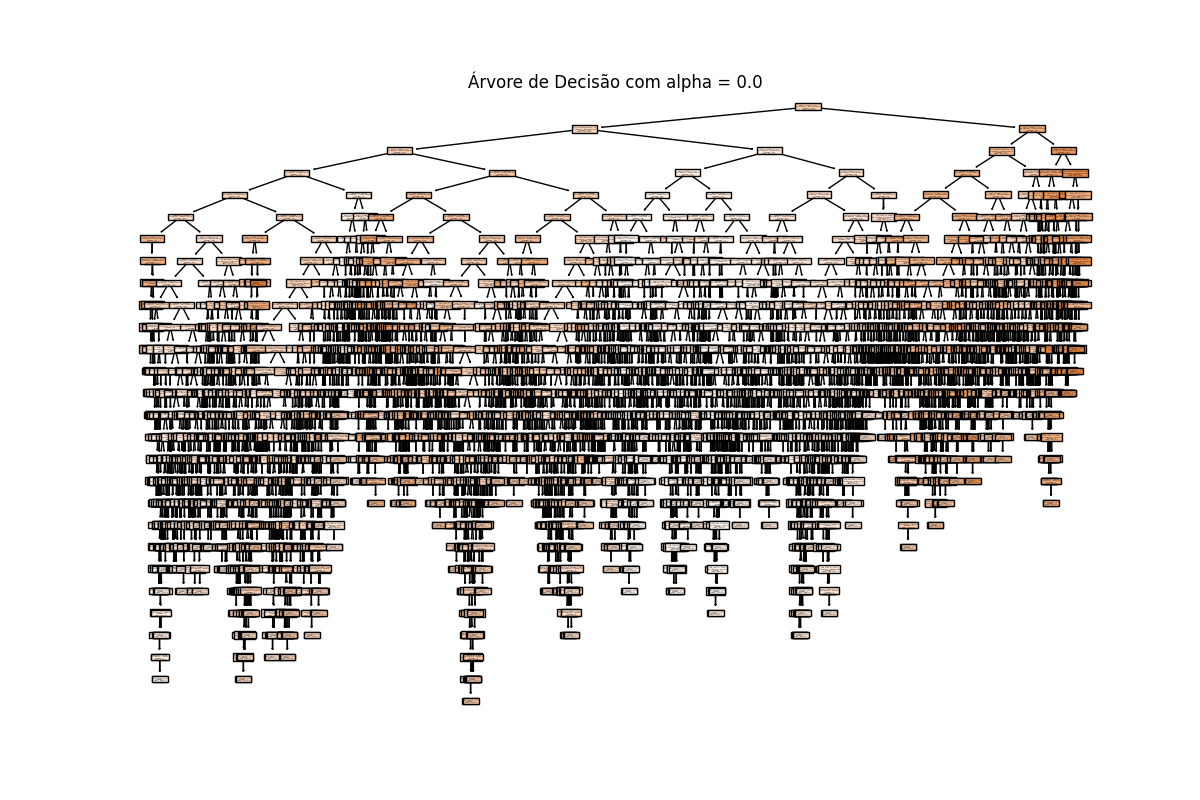

In [11]:
# Salvando a árvore como imagem
plt.figure(figsize=(12, 8))  # Ajustando o tamanho da imagem
plot_tree(best_tree, filled=True, feature_names=X.columns)
plt.title(f"Árvore de Decisão com alpha = {ccp_alphas[best_alpha_idx]}")
plt.savefig('/content/dec_tree.png')  # Salva a árvore como imagem no Colab
plt.close()  # Fecha o gráfico para liberar memória

# Exibindo a imagem no Colab
from IPython.display import Image
Image(filename='/content/dec_tree.png')  # Exibe a imagem salva
